In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-poster')

In [3]:
df = pd.read_csv("clickvsmani_all_exp_with_identity.csv")

In [44]:
df.head()

,proteinaA_proteinaB,SO_mani,SO_click,RMSD_mani,RMSD_click,cluster,identity_score,num_residuos_total_click,q1,size
0,4BWP_A_4BWP_B,61.92,80.91,2.3101,1.42,cluster_70,96.37,372,"(288.0, 483.0]",P
1,5FHX_H_5HCG_H,64.76,70.78,2.3003,2.11,cluster_95,97.65,332,"(288.0, 483.0]",P
2,2ZMF_A_2ZMF_B,80.84,86.23,1.9041,1.48,cluster_70,97.09,167,"(132.0, 182.0]",s
3,4PED_A_5I35_A,84.25,78.86,2.1317,2.34,cluster_30,98.92,369,"(288.0, 483.0]",P
4,3SHP_A_3SHP_B,88.96,90.91,1.5509,1.20,cluster_30,92.31,154,"(132.0, 182.0]",s


In [28]:
corte_num_res = pd.qcut(df.num_residuos_total_click,4,precision=0)
df['q1'] = corte_num_res
df['size'] = df.q1.cat.rename_categories(["X", "s", "v","P"])
df.head()

,proteinaA_proteinaB,SO_mani,SO_click,RMSD_mani,RMSD_click,cluster,identity_score,num_residuos_total_click,q1,size
0,4BWP_A_4BWP_B,61.92,80.91,2.3101,1.42,cluster_70,96.37,372,"(288.0, 483.0]",P
1,5FHX_H_5HCG_H,64.76,70.78,2.3003,2.11,cluster_95,97.65,332,"(288.0, 483.0]",P
2,2ZMF_A_2ZMF_B,80.84,86.23,1.9041,1.48,cluster_70,97.09,167,"(132.0, 182.0]",s
3,4PED_A_5I35_A,84.25,78.86,2.1317,2.34,cluster_30,98.92,369,"(288.0, 483.0]",P
4,3SHP_A_3SHP_B,88.96,90.91,1.5509,1.20,cluster_30,92.31,154,"(132.0, 182.0]",s


In [29]:
plt.style.use('seaborn-white')

In [30]:
df['size'].unique()

[P, s, v, X]
Categories (4, object): [X < s < v < P]

In [31]:
['s','P','v','X'] #NO
['X','s','v','P']

['X', 's', 'v', 'P']

# SS

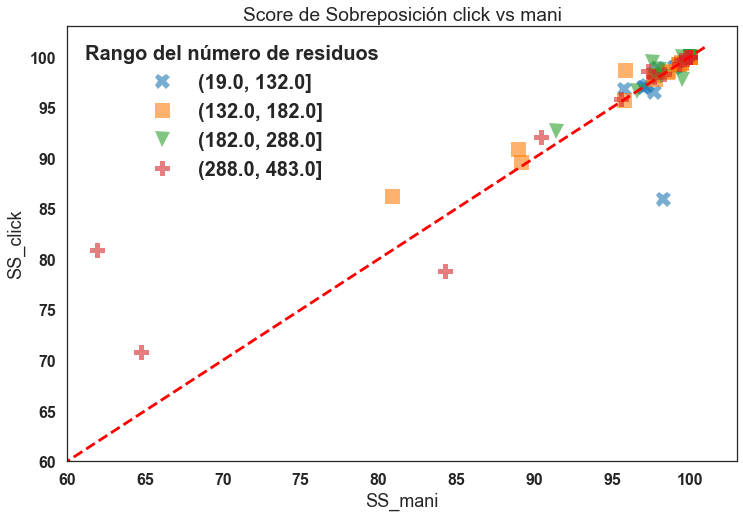

In [63]:
for i in ['X','s','v','P']:
    X = df[df['size']==i].SO_mani.values
    y = df[df['size']==i].SO_click.values
    label = df[df['size']==i].q1.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker=i, alpha=0.6, label=label,ms=15)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Rango del número de residuos", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")
plt.savefig("SSclickvsmani_res_number.svg",format='svg', dpi=1200)

In [59]:
sorted(df['cluster'].unique())

['cluster_30', 'cluster_50', 'cluster_70', 'cluster_95']

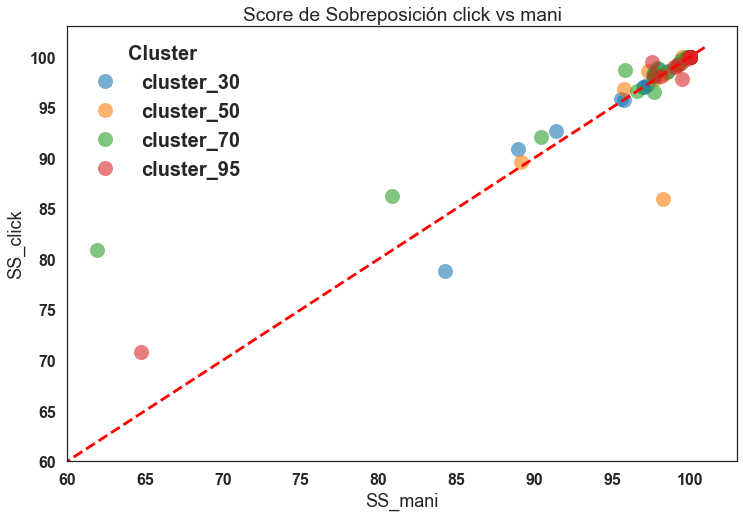

In [64]:
for i in sorted(df['cluster'].unique()):
    X = df[df['cluster']==i].SO_mani.values
    y = df[df['cluster']==i].SO_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', alpha=0.6, label=label, ms=15)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")
plt.savefig("SSclickvsmani_cluster_identity.svg",format='svg', dpi=1200)

# RMSD

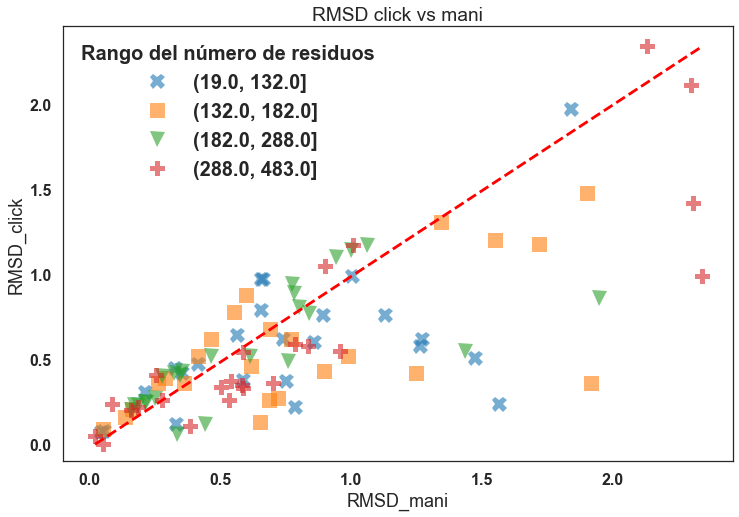

In [65]:
for i in ['X','s','v','P']:
    X = df[df['size']==i].RMSD_mani.values
    y = df[df['size']==i].RMSD_click.values
    label = df[df['size']==i].q1.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker=i, alpha=0.6, label=label,ms=15)
    

plt.title('RMSD click vs mani')
plt.legend(loc=0, title="Rango del número de residuos", fontsize='medium',fancybox = True)
plt.xlim(-0.1,)
plt.ylim(-0.1,)
plt.xlabel("RMSD_mani")
plt.ylabel("RMSD_click")
plt.plot([df.RMSD_mani.min(),df.RMSD_mani.max()],[df.RMSD_click.min(),df.RMSD_click.max()],'--', color="r")

plt.savefig("RMSDclickvsmani_res_number.svg",format='svg', dpi=1200)

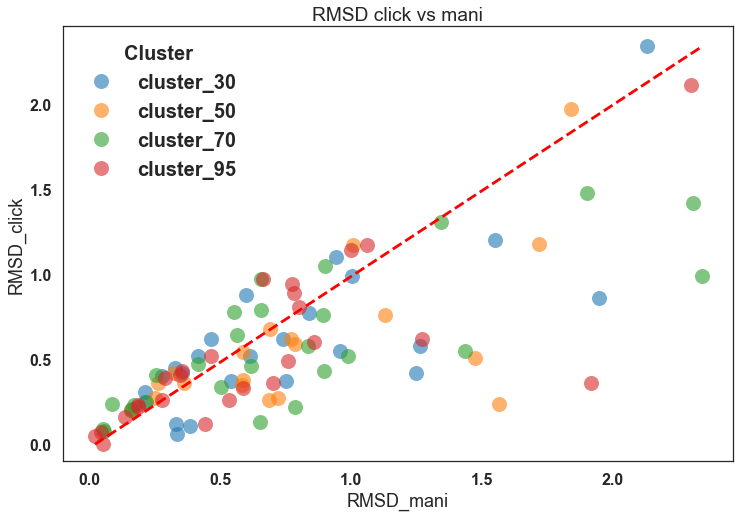

In [66]:
for i in sorted(df['cluster'].unique()):
    X = df[df['cluster']==i].RMSD_mani.values
    y = df[df['cluster']==i].RMSD_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker="o", alpha=0.6, label=label,ms=15)
    
plt.title('RMSD click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(-0.1,)
plt.ylim(-0.1,)
plt.xlabel("RMSD_mani")
plt.ylabel("RMSD_click")
plt.plot([df.RMSD_mani.min(),df.RMSD_mani.max()],[df.RMSD_click.min(),df.RMSD_click.max()],'--', color="r")
plt.savefig("RMSDclickvsmani_cluster_identity.svg", format='svg', dpi=1200)

# Imagenes para presentacion TODO EXAGERADO!!!

# SS

In [57]:
font = {'family' : 'sans','weight' : 'bold','size'   : 20}
plt.rc('font', **font)
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['figure.figsize'] = (12,8)

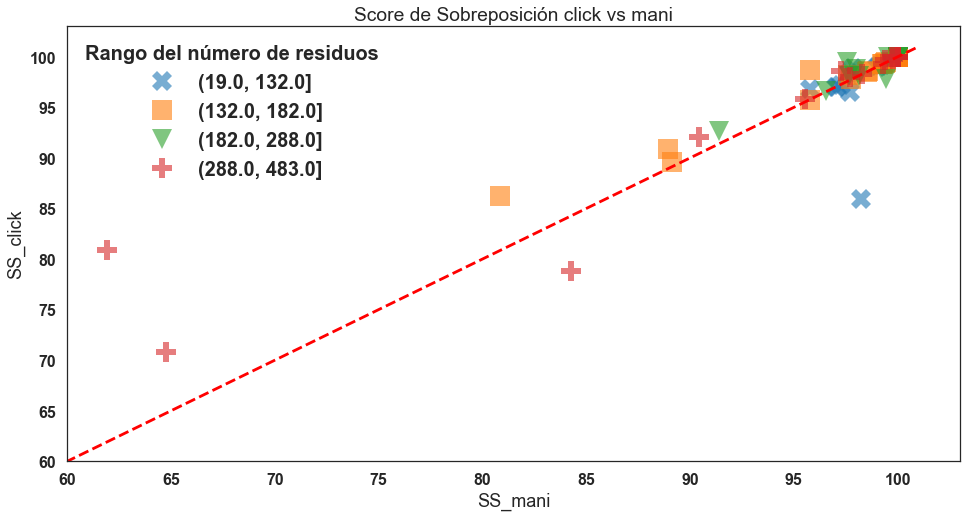

In [39]:
for i in ['X','s','v','P']:
    X = df[df['size']==i].SO_mani.values
    y = df[df['size']==i].SO_click.values
    label = df[df['size']==i].q1.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker=i, alpha=0.6, label=label,ms=20)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Rango del número de residuos", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")
plt.savefig("SSclickvsmani_res_number_presentacion.svg",format='svg', dpi=1200)

In [40]:
sorted(df['cluster'].unique())

['cluster_30', 'cluster_50', 'cluster_70', 'cluster_95']

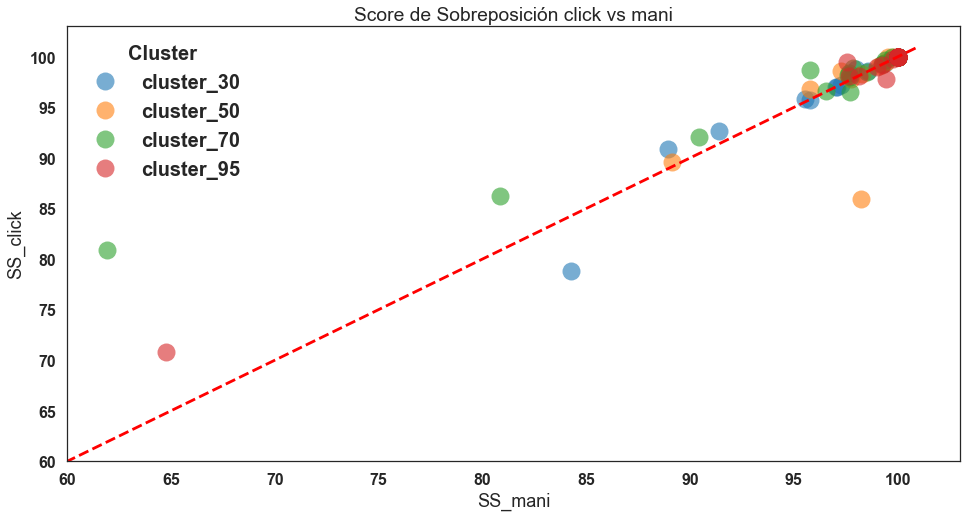

In [41]:
for i in sorted(df['cluster'].unique()):
    X = df[df['cluster']==i].SO_mani.values
    y = df[df['cluster']==i].SO_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', alpha=0.6, label=label, ms=18)
    

plt.title('Score de Sobreposición click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(60,103)
plt.ylim(60,103)
plt.xlabel("SS_mani")
plt.ylabel("SS_click")
plt.plot([0,101],[0,101],'--', color="r")
plt.savefig("SSclickvsmani_cluster_identity_presentacion.svg",format='svg', dpi=1200)

# RMSD

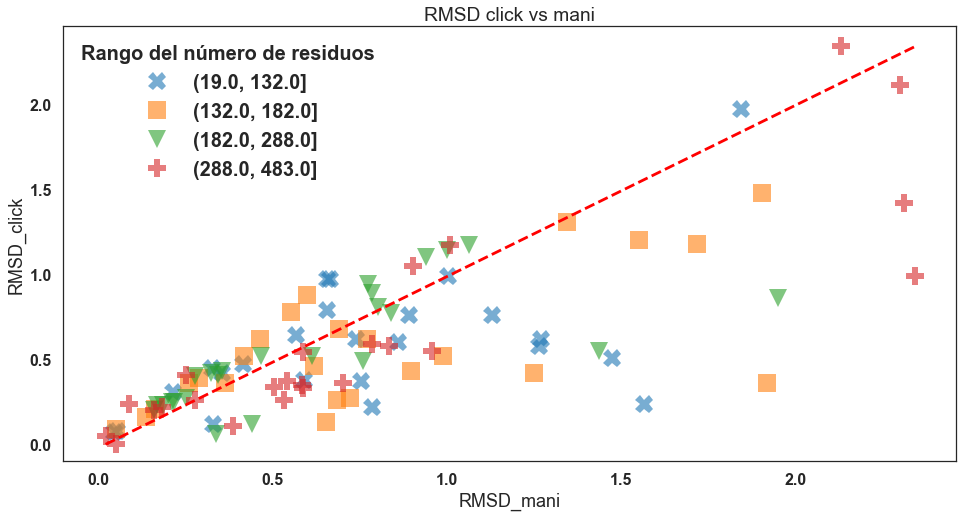

In [42]:
for i in ['X','s','v','P']:
    X = df[df['size']==i].RMSD_mani.values
    y = df[df['size']==i].RMSD_click.values
    label = df[df['size']==i].q1.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker=i, alpha=0.6, label=label,ms=18)
    

plt.title('RMSD click vs mani')
plt.legend(loc=0, title="Rango del número de residuos", fontsize='medium',fancybox = True)
plt.xlim(-0.1,)
plt.ylim(-0.1,)
plt.xlabel("RMSD_mani")
plt.ylabel("RMSD_click")
plt.plot([df.RMSD_mani.min(),df.RMSD_mani.max()],[df.RMSD_click.min(),df.RMSD_click.max()],'--', color="r")

plt.savefig("RMSDclickvsmani_res_number_presentacion.svg",format='svg', dpi=1200)

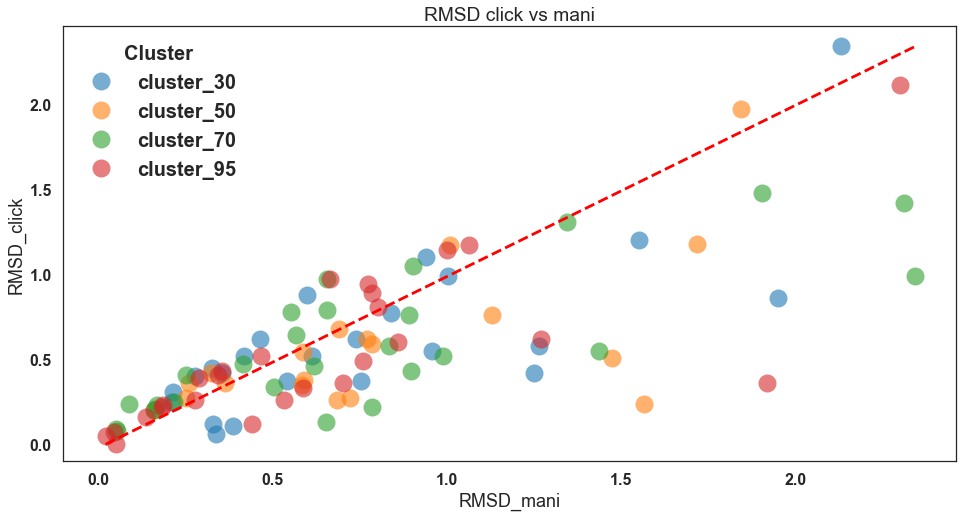

In [43]:
for i in sorted(df['cluster'].unique()):
    X = df[df['cluster']==i].RMSD_mani.values
    y = df[df['cluster']==i].RMSD_click.values
    label = df[df['cluster']==i].cluster.astype(str).unique()[0]
    plt.plot(X,y, 'o', marker="o", alpha=0.6, label=label,ms=18)
    
plt.title('RMSD click vs mani')
plt.legend(loc=0, title="Cluster", fontsize='medium',fancybox = True)
plt.xlim(-0.1,)
plt.ylim(-0.1,)
plt.xlabel("RMSD_mani")
plt.ylabel("RMSD_click")
plt.plot([df.RMSD_mani.min(),df.RMSD_mani.max()],[df.RMSD_click.min(),df.RMSD_click.max()],'--', color="r")
plt.savefig("RMSDclickvsmani_cluster_identity_presentacion.svg", format='svg', dpi=1200)